In [1]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
from rasterio.plot import show, adjust_band
import pandas as pd

In [2]:
site_names = ['Haworth_final_adj_5mpp_surf.tif'] # put the names of the sites here

Haworth_final_adj_5mpp_surf.tif opened


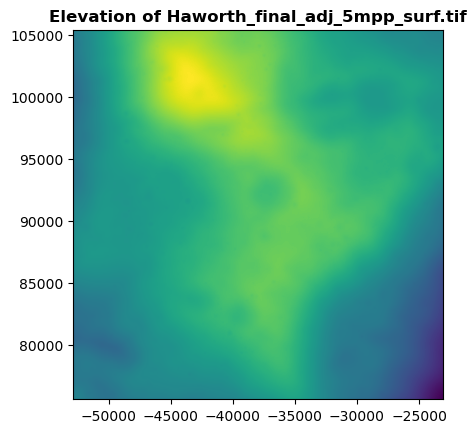

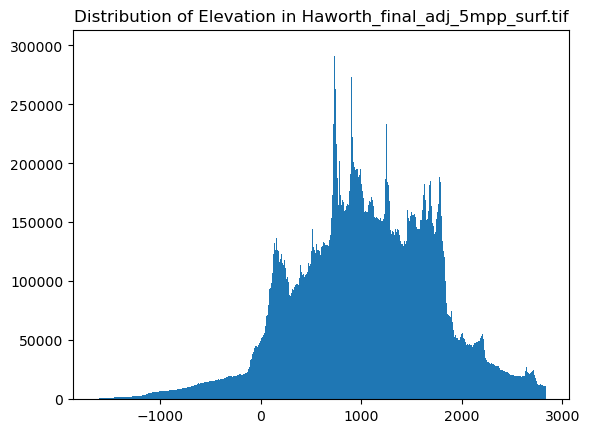

                  0
count  3.552160e+07
mean   1.039324e+03
std    6.871302e+02
min   -1.642901e+03
25%    5.841916e+02
50%    1.032986e+03
75%    1.549237e+03
max    2.842214e+03




In [3]:
GTIFF_SKIP_PACKBITS_DECODE_ERROR = True
d_i = np.array([])
for i, site in enumerate(site_names):
    with rasterio.open(site, 'r') as df_i:
        #this is the pdf we're gonna save to

        print(site.strip(), "opened")
        show(df_i, title='Elevation of '+site)
        d_i = np.array(df_i.read(1))
        transform = df_i.transform 

        #plt.plot(d_i)
        #plt.title(f"Slopes in {site.strip()}")
        #plt.show()

        plt.hist(d_i.ravel(), bins=500)
        plt.title(f"Distribution of Elevation in {site}")
        plt.show()

        df_describe = pd.DataFrame(d_i.ravel())
        print(df_describe.describe())

        # make mesh of surface?

        print()
        print()

In [4]:
from rasterio.transform import xy

In [10]:
smaller = []
for i, row in enumerate(d_i):
    if (i % 10 == 0):
        tmp_row = []
        for j in range(d_i.shape[0]):
            if j % 10 == 0:
                tmp_row.append(d_i[i][j])
        smaller.append(tmp_row)
smaller = np.array(smaller)

In [11]:
rows, cols = smaller.shape
print(smaller.shape)
x_coords, y_coords = np.meshgrid(
    np.arange(rows), 
    np.arange(cols)
)

(596, 596)


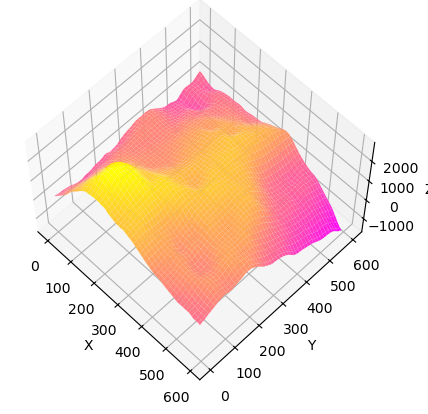

In [12]:
fig = plt.figure()
ax2 = fig.add_subplot(projection='3d')
ax2.plot_surface(x_coords, y_coords, smaller, cmap='spring', edgecolor='none')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.view_init(elev=60., azim=-45, roll=0)

In [13]:
import surf2stl

# export surface to a stl format file
# data = np.zeros(d_i.ravel().shape, dtype=mesh.Mesh.dtype)
surf2stl.write('haworth.stl', x_coords, y_coords, smaller)

#my_mesh.save('haworth_file.stl')

Wrote 708050 facets
